# 연속형 - 연속형 변수

## 피어슨 상관 계수(Pearson Correlation Coefficient)
- $r_{XY} = \frac{\sum_i^n{\left(X_i - \bar {X} \right) \left(Y_i - \bar{Y} \right)}} {\sqrt{\sum_i^n{\left( X_i-\bar{X} \right) ^2}} \sqrt{\sum_i^n{\left( Y_i-\bar{Y} \right) ^2}}}$

In [1]:
from sklearn.datasets import make_regression
import numpy as np

X, Y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    noise=20,
    random_state=0
)

X = X.flatten()
Y = Y/50

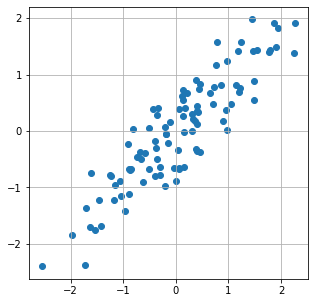

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(X,Y)
plt.grid()
plt.show()

In [3]:
def PCC(X, Y):
    X_bar, Y_bar = np.mean(X), np.mean(Y)
    
    p = np.sum((X-X_bar) * (Y-Y_bar)) / ( np.sqrt(np.sum((X-X_bar)**2)) * np.sqrt(np.sum((Y-Y_bar)**2)))
    return p

In [4]:
PCC(X, Y)

0.8962899802271834

In [5]:
from scipy.stats import pearsonr

p, _ = pearsonr(X, Y)
p

0.8962899802271835

# 연속형 - 연속형(순서형) 변수

## 스피어만 상관 계수(Spearman Correlation Coefficient)

- 데이터의 순위끼리의 피어슨 상관 계수
- $\rho = 1 - \frac{6\sum d_i^2}{n(n^2-1)}$
    - $d_i$: 매칭되는 데이터의 순위 간의 차이
    
```python
ranka = [1, 2, 3, 4]
rankb = [3, 1, 2, 4]

d = [2, 1, 1, 0]
d2 = [4, 1, 1, 0]
```

In [6]:
def SCC(X, Y):
    from scipy.stats import rankdata
    rankX = rankdata(X)
    rankY = rankdata(Y)
    
    d2 = (rankX - rankY) ** 2
    n = len(X)
    
    rho = 1 - 6 * np.sum(d2) / (n * (n**2-1))
    return rho

In [7]:
SCC(X, Y)

0.8813441344134414

In [8]:
from scipy.stats import spearmanr

s, _ = spearmanr(X, Y)
s

0.8813441344134413

In [9]:
# 참고 - 순위 데이터를 만든 후 피어슨 상관계수로 구할 수 있다.
from scipy.stats import rankdata
rankX = rankdata(X)
rankY = rankdata(Y)

p, _ = pearsonr(rankX, rankY)
p

0.8813441344134414

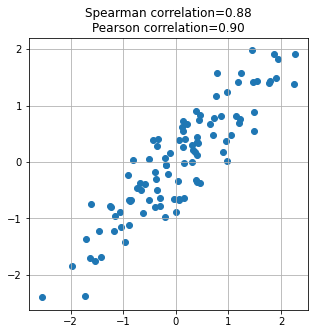

In [10]:
scc = SCC(X, Y)
pcc = PCC(X, Y)

plt.figure(figsize=(5, 5))
plt.scatter(X, Y)
plt.title(f'Spearman correlation={scc:.2f}\nPearson correlation={pcc:.2f}')
plt.grid()
plt.show()

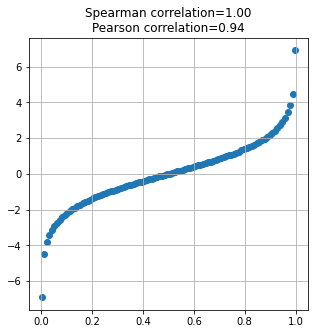

In [11]:
def logit(xs):
    return np.log(xs / (1-xs))

xs = np.linspace(0.001, 0.999, 100)
ys = logit(xs)

pcc = PCC(xs, ys)
scc = SCC(xs, ys)

plt.figure(figsize=(5, 5))
plt.scatter(xs, ys)
plt.grid()
plt.title(f'Spearman correlation={scc:.2f}\nPearson correlation={pcc:.2f}')
plt.show()

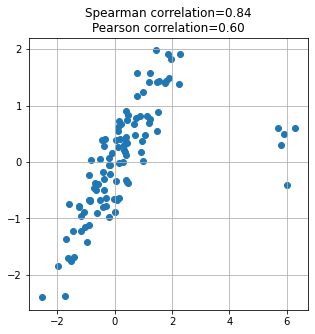

In [12]:
Xprime = X.copy()
Yprime = Y.copy()

Xprime = np.append(Xprime, [5.7, 5.8, 5.9, 6.0, 6.3])
Yprime = np.append(Yprime, [0.6, 0.3, 0.5, -0.4, 0.6])

pcc = PCC(Xprime, Yprime)
scc = SCC(Xprime, Yprime)

plt.figure(figsize=(5, 5))
plt.scatter(Xprime, Yprime)
plt.title(f'Spearman correlation={scc:.2f}\nPearson correlation={pcc:.2f}')
plt.grid()
plt.show()

## 켄달의 타우(Kenddall's Tau)
- 모든 pair에 대하여 $C$(`concordant pair`)와 $D$(`disconcordant pair`)를 계산
- $C$: 비교할 두 대상 순위의 순서가 같은 쌍의 개수
- $D$: 비교할 두 대상 순위의 순서가 다른 쌍의 개수
- $\frac{C-D}{C+D}$
- 예
    ```python
    # rank
    a = [1, 2, 3]
    b = [3, 1, 2]
    
    """
    0, 1 ==> a[0] < a[1], b[0] > b[1] ==> D += 1
    0, 2 ==> a[0] < a[2], b[0] > b[2] ==> D += 1
    1, 2 ==> a[1] < a[2], b[1] < b[2] ==> C += 1
    """
    C, D = 1, 2
    
    result = (C-D) / (C+D)
    ```
- `scipy`에서는 `tau = (P - Q) / sqrt((P + Q + T) * (P + Q + U)) where P is the number of concordant pairs, Q the number of discordant pairs, T the number of ties only in x, and U the number of ties only in y.`라고 정의하고 있다

In [13]:
def KT(X, Y):
    from itertools import combinations
    
    comb = combinations(range(len(X)), 2)
    
    C, D = 0, 0
    for i, j in comb:
        if ((X[i] > X[j]) and (Y[i] > Y[j])) or ((X[i] < X[j]) and (Y[i] < Y[j])):
            C += 1
        else:
            D += 1
    
    return (C-D)/(C+D)

In [14]:
KT(X, Y)

0.7042424242424242

In [15]:
from scipy.stats import kendalltau

tau, _ = kendalltau(X, Y)
tau

0.7042424242424243

# 범주형 - 연속형 변수

## 점이연 상관 계수(Point Biserial Correlation Coefficient)
- X: 연속형 변수, Y: 범주형 변수
- 범주형 변수가 오직 두 값만을 가진다고 가정
- $r_{pb} = \frac{M_1-M_0}{s_n} \sqrt{\frac{n_1n_0}{n^2}}$
    - $M_i$: Y의 그룹 $i$의 평균
    - $n_i$: Y의 그룹 $i$의 데이터 갯수
    - $n$: 전체 데이터 갯수
    - $s_n$: X의 표준편차
- `scipy`에서는 $n^2$이 아닌 $n(n-1)$ 사용

In [16]:
def PBCC(X, Y):
    """
    X: continuous variable
    Y: binary variable
    """
    X = np.array(X)
    Y = np.array(Y)
    
    unique = np.sort(np.unique(Y))
    assert len(unique)==2, "Y must be binary variable"
    
    var0 = unique[0]
    var0_idx = np.where(Y==var0)
    M0 = np.mean(X[var0_idx])
    n0 = len(var0_idx)
    
    var1 = unique[1]
    var1_idx = np.where(Y==var1)
    M1 = np.mean(X[var1_idx])
    n1 = len(var1_idx)
    
    sn = np.std(X)
    
    n = n0 + n1
    
    rpb = (M1-M0)/sn * np.sqrt(n1*n0 / (n)**2)
    return rpb

In [17]:
Y = np.array([1,1,0,1,1,0,0,0])
X = np.array([1,1,2,6,6,7,8,9])

PBCC(X, Y)

-0.5

In [18]:
from scipy import stats

pbr = stats.mstats.pointbiserialr(Y,X)
print( pbr.correlation )

-0.5


In [19]:
Y = np.array([0, 0, 0, 1, 1, 1, 1])
X = np.array([0, 1, 2, 3, 4, 5, 6])

PBCC(X, Y)

0.875

In [20]:
from scipy import stats

pbr = stats.mstats.pointbiserialr(Y,X)
print( pbr.correlation )

0.8660254037844386


# 순서형 - 연속형 변수

## 이연 상관계수(Biserial Correlation Coefficient)
- 연속 변수를 이분화한 경우 사용(age >= 50, age < 50)
- 점이연 상관계수와 비슷한 공식, 값은 항상 이연 상관계수가 더 큼
- $r_b = (M_1-M_0) (pq/X) / \sigma_X$
    - $M_i$: 그룹 $i$의 평균
    - $p$: 그룹의 데이터 비율($q=1-p$)
    - $X$: $P(z'>z)=p$가 되게 하는 $z$의 정규분포 값
    - $\sigma_X$: 표준편차

In [21]:
def BCC(X, Y):
    """
    X: continuous variable
    Y: binary variable
    """
    X = np.array(X)
    Y = np.array(Y)
    
    unique = np.sort(np.unique(Y))
    assert len(unique)==2, "Y must be binary variable"
    
    n = len(X)
    
    var0 = unique[0]
    var0_idx = np.where(Y==var0)
    M0 = np.mean(X[var0_idx])
    p = len(var0_idx) / n
    
    var1 = unique[1]
    var1_idx = np.where(Y==var1)
    M1 = np.mean(X[var1_idx])
    q = 1 - p
    
    sigma = np.std(X)
    
    from scipy.stats import norm

    rv = norm(0, 1)
    z = rv.isf(p)
    x = rv.pdf(z)
    
    rb = (M1-M0) * (p*q/x) / sigma
    return rb

In [22]:
BCC(X, Y)

0.9496582499380102

# 범주형 - 범주형 변수

## 파이 계수(Phi Coefficient)
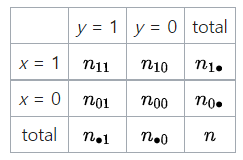

- $\Phi = \frac{n_{11}n_{00} - n_{10}n_{01}}{\sqrt{n_{1\cdot}n_{0\cdot}n_{\cdot 0}n_{\cdot 1}}}$

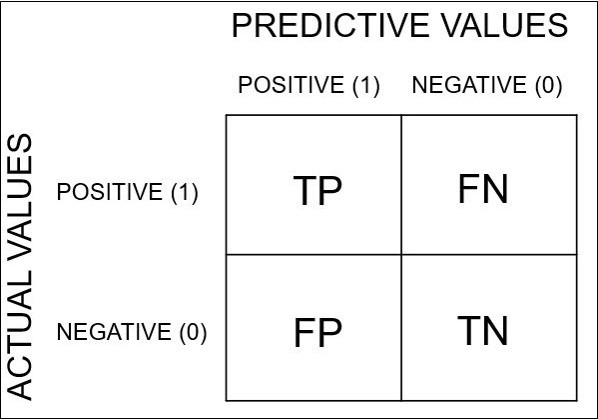

- 머신러닝에서는 Matthews Correlation Coefficient로 사용됨
- $\text{MCC} = \frac{TP \times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$

In [23]:
def MCC(X, Y):
    """
    X: actual
    Y: prediction
    """
    
    X = np.array(X)
    Y = np.array(Y)
    
    uniqueX = list(np.sort(np.unique(X)))
    uniqueY = list(np.sort(np.unique(Y)))
    assert (uniqueX == [0, 1]) and (uniqueY == [0, 1]), "X and Y must be composed by 0 and 1"
    
    import pandas as pd
    df = pd.DataFrame({'X':X, 'Y':Y})
    ct = pd.crosstab(index=df['X'], columns=df['Y'])
    
    TP = ct.loc[1, 1]
    FN = ct.loc[1, 0]
    FP = ct.loc[0, 1]
    TN = ct.loc[0, 0]
    
    MCC = (TP*TN - FP*FN) / np.sqrt( (TP+FP)*(TP+FN)*(TN+FP)*(TN+FN) )
    
    return MCC

In [24]:
actual = [0,1,1,1,1,1,1,1,0,0,0,0]
prediction = [0,0,1,1,1,1,1,1,0,0,0,1]

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(actual, prediction)
cm

array([[4, 1],
       [1, 6]], dtype=int64)

In [26]:
MCC(actual, prediction)

0.6571428571428571

In [27]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(actual, prediction)

0.6571428571428571

## 크래머 V(Cramer's V)
- 2개 이상의 범주로 나누어지는 집단 간의 상관계수
- $V = \sqrt{\frac{\chi ^2}{n(q-1)}}$
    - $\chi ^2$: 카이제곱 공식에 의해 구함
    - $n$: 데이터 수
    - $q$: row 또는 column 수 중 작은 값

In [28]:
def CramerV(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    
    uniqueX = list(np.sort(np.unique(X)))
    uniqueY = list(np.sort(np.unique(Y)))
    
    import pandas as pd
    df = pd.DataFrame({'X':X, 'Y':Y})
    ct = pd.crosstab(index=df['X'], columns=df['Y'])
    
    from scipy.stats import chi2_contingency
    
    chi2, _, _, _ = chi2_contingency(ct)
    
    V = np.sqrt(chi2 / (len(X)*min(len(uniqueX), len(uniqueY))))
    
    return V

In [29]:
CramerV(actual, prediction)

0.34345186514775167

## 사분상관계수(Tetrachoric Correlation)
- 두 개의 변수가 정규 분포를 이루고 직선적 관계를 가질 때, 2개의 범주로 나누어 상관을 따질 때 사용
- 파이 계수와 비슷하지만 정규 분포, 직선적 관계라는 가정이 필요하다는 점에서 차이가 난다.

|      | y>n | y<=n |
|:----:|:---:|:----:|
|  **x>m** |  A  |   B  |
| **x<=m** |  C  |   D  |


- $r_t = \cos \left( \frac{180^{\circ} \sqrt{AD}}{\sqrt{AD}+\sqrt{BC}} \right)$

In [30]:
def TC(X, Y, m=None, n=None):
    X = np.array(X)
    Y = np.array(Y)
    
    if m is None:
        m = np.mean(X)
    
    if n is None:
        n = np.mean(Y)
    
    import pandas as pd
    df = pd.DataFrame({'X':X, 'Y':Y})
    
    df['XL'] = df['X'].apply(lambda x:1 if x > m else 0)
    df['YL'] = df['Y'].apply(lambda y:1 if y > n else 0)
    
    ct = pd.crosstab(index=df['XL'], columns=df['YL'])
    A = ct.loc[1, 1]
    B = ct.loc[1, 0]
    C = ct.loc[0, 1]
    D = ct.loc[0, 0]
    
    from math import cos, pi
    
    rt = cos(pi * np.sqrt(A*D) / (np.sqrt(A*D)+np.sqrt(B*C)))
    
    return rt

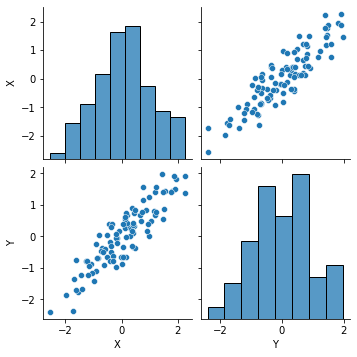

In [31]:
X, Y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    noise=20,
    random_state=0
)

X = X.flatten()
Y = Y/50

import seaborn as sns
import pandas as pd

df = pd.DataFrame({'X':X, 'Y':Y})
sns.pairplot(df)
plt.show()

In [32]:
TC(X, Y, m=0, n=0)

-0.8769800464398287